# Seam Carving
# Phase 1

In [325]:
import numpy as np
from matplotlib import pyplot as plt
import imageio

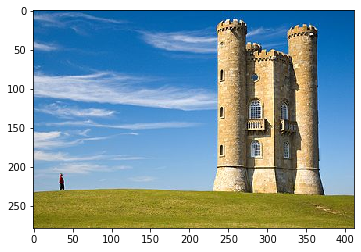

In [326]:
img = imageio.imread("seam_carving_img.jpg")/255
plt.imshow(img)

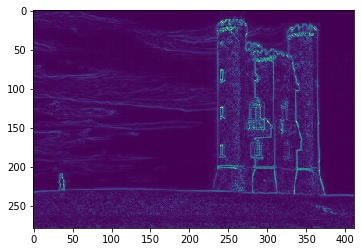

In [327]:
def calc_energy(img):
    x=abs(np.gradient(img,axis=0))
    y=abs(np.gradient(img,axis=1))
    i=array(x+y)
    return mean(i,-1)
energy_map = calc_energy(img)
plt.imshow(energy_map)

# Phase 2

In [328]:
def minimum_seam(img):
    
    r, c, _ = img.shape
    energy_map = calc_energy(img)
    
    M = energy_map.copy()
    backtrack = np.zeros_like(M, dtype=np.int)
    for i in range(1, r):
        for j in range(0, c):
            
            if j==0:
                idx = np.argmin(M[i - 1, j:j + 2])
                backtrack[i, j] = idx + j
                min_energy = M[i - 1, idx + j]
            else:
                idx = np.argmin(M[i - 1, j - 1:j + 2])
                backtrack[i, j] = idx + j - 1
                min_energy = M[i - 1, idx + j - 1]
                
            M[i, j] += min_energy

    return M, backtrack, energy_map

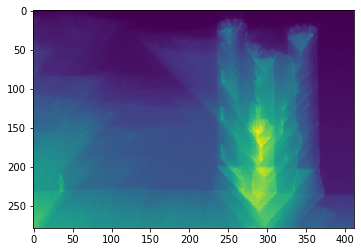

In [329]:
cumulative_energy_map, b, em = minimum_seam(img)
plt.imshow(cumulative_energy_map)

# Phase 3

In [330]:
def carve_column(_img):
    r, c, _ = _img.shape

    M, backtrack, em = minimum_seam(_img)

    mask = np.ones((r, c), dtype=np.bool)
    j = np.argmin(M[-1])
    
    for i in range(r-1,-1,-1):
        _img[i, j] =  [1,0,0]
        M[i, j] = 1
        em[i, j] = 1
        j = backtrack[i, j]
        
    mask = np.stack([mask] * 3, axis=2)
 
    # Delete all the pixels marked False in the mask,
    # and resize it to the new image dimensions
    #img = img[mask].reshape((r, c - 1, 3))

    return M, _img, em

<Figure size 432x288 with 0 Axes>

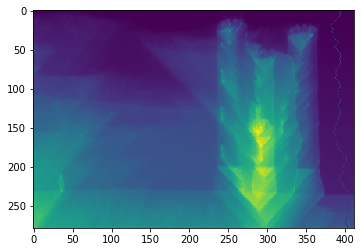

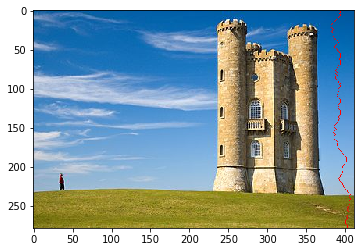

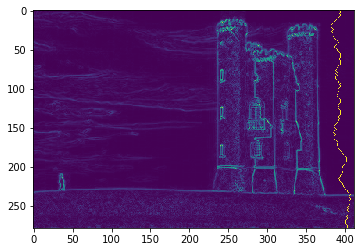

<Figure size 432x288 with 0 Axes>

In [331]:
tmp1_img = img.copy()
for i in range(1):
    new_M, new_img, new_em = carve_column(tmp1_img)

plt.imshow(new_M)
figure()
plt.imshow(new_img)
figure()
plt.imshow(new_em)
figure()

# Phase 4

In [332]:
def delete_column(_img):
    r, c, _ = _img.shape

    M, backtrack, em = minimum_seam(_img)

    mask = np.ones((r, c), dtype=np.bool)

    j = np.argmin(M[-1])

    for i in  range(r-1,-1,-1):
        mask[i, j] = False
        j = backtrack[i, j]
        
    mask = np.stack([mask] * 3, axis=2)
 
    # Delete all the pixels marked False in the mask,
    # and resize it to the new image dimensions
    _img = _img[mask].reshape((r, c - 1, 3))

    return _img

<Figure size 432x288 with 0 Axes>

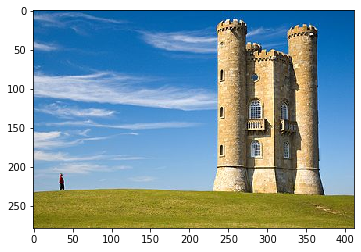

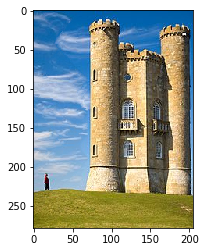

<Figure size 432x288 with 0 Axes>

In [333]:
tmp2_img = img.copy()
plt.imshow(tmp2_img)
figure()
while len(tmp2_img[0, :]) >= (len(img[0, :])/2):
#for x in range(70):
    tmp2_img = delete_column(tmp2_img)

plt.imshow(tmp2_img)
figure()